# Business Problem
1. A certain food-based company conducted a survey with the help of a fitness company to find the relationship between a person’s weight gain and the number of calories they consumed in order to come up with diet plans for these individuals. Build a Simple Linear Regression model with calories consumed as the target variable. Apply necessary transformations and record the RMSE and correlation coefficient values for different models. 


# Business Objective
1. Build a Simple Linear Regression model to understand how weight gain is related to calories consumed.
2. The target variable (Y) is calories consumed.
3. We aim to minimize Root Mean Squared Error (RMSE) and analyze the correlation coefficient.

# Business Constraints
1. The model should be interpretable (no complex transformations if not necessary).
2. The data should be properly cleaned before training.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
data=pd.read_csv("calories_consumed.csv")

In [3]:
data.head()

,Weight gained (grams),Calories Consumed
0,108,1500
1,200,2300
2,900,3400
3,200,2200
4,300,2500


In [4]:
data.describe()

,Weight gained (grams),Calories Consumed
count,14.000000,14.000000
mean,357.714286,2340.714286
std,333.692495,752.109488
min,62.000000,1400.000000
25%,114.500000,1727.500000
50%,200.000000,2250.000000
75%,537.500000,2775.000000
max,1100.000000,3900.000000


In [5]:
data.isnull().sum() # Not containing the null values

Weight gained (grams)    0
Calories Consumed        0
dtype: int64

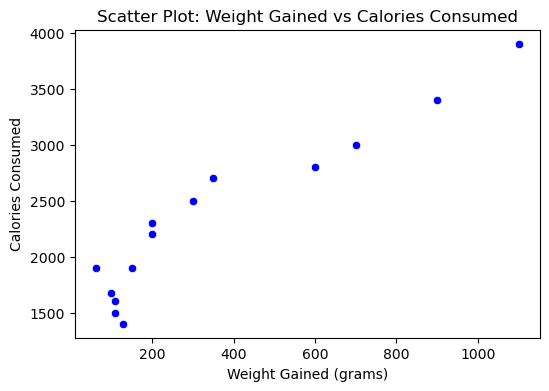

In [6]:

plt.figure(figsize=(6,4))
sns.scatterplot(x=data['Weight gained (grams)'],y=data['Calories Consumed'],color='Blue')
plt.xlabel('Weight Gained (grams)')
plt.ylabel('Calories Consumed')
plt.title('Scatter Plot: Weight Gained vs Calories Consumed')
plt.show()

##The scatter plot shows a positive relationship between weight gained and calories consumed, suggesting that as weight increases, calorie intake also increases.

##Now, let's calculate the correlation coefficient to quantify this relationship. 

A value close to 1 or -1 indicates a strong relationship, while a value near 0 suggests a weak correlation. ​

In [7]:
#Correlation Coefficient
correlation=data['Weight gained (grams)'].corr(data['Calories Consumed'])
#correlation=data.corr().iloc[0,1] # same meaning
correlation

0.9469910088554458

#The Correlation Coefficient is 0.947 which is close to 1, indicating a strong positive correlation between weight gained calories consumed.

#let's proceed with building the Simple Linear Regression model and evaluating its performance. 

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [9]:
#Defining independent(X) and dependent (Y) variables
X=data[['Weight gained (grams)']]  #Independent Variable
Y=data['Calories Consumed'] #Dependent Variable

In [10]:
#Splitting data into training and testing sets(80% train, 20% test)
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [11]:
#Creating and training the model
model=LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [17]:
#Making the Predictions
Y_pred=model.predict(X_test)
Y_pred  #represents the predicted values of calories consumed

array([3906.91342884, 1938.77788666, 1851.76557848])

In [19]:
#Calculating RMSE(Root Mean Squared Error)
rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
rmse

204.36123425476396

In [21]:
r2_score(Y_test,Y_pred)

0.9621097150609703

In [22]:
# If we apply Log transformation Here...

In [23]:
data['Log_Calories']=np.log(data['Calories Consumed'])

In [24]:
X=data[['Weight gained (grams)']]
Y_log=data['Log_Calories']

In [25]:
#Train Model
X_train,X_test,Y_train_log,Y_test_log=train_test_split(X,Y_log,test_size=0.2,random_state=42)


In [26]:
log_model=LinearRegression()
log_model.fit(X_train,Y_train_log)

LinearRegression()

In [27]:
Y_pred_log = log_model.predict(X_test)
Y_pred_log

array([8.38440068, 7.55255708, 7.51578084])

In [28]:
Y_pred_original_scale = np.exp(Y_pred_log)


In [29]:
rmse_log = np.sqrt(mean_squared_error(data["Calories Consumed"].loc[Y_test_log.index], Y_pred_original_scale))
rmse_log

337.7247650716509

In [30]:
from sklearn.metrics import r2_score

In [31]:
r2_score(Y_test,Y_pred)

0.9621097150609703